#Problem Statement
You are a data-scientist of a global company. As a data-scientist you have to build an image classification model to classify 2 categories of images namely cat and dogs

##Importing libraries
Start off this project by importing all the necessary libraries that will be required for the process.

In [37]:
import os
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import numpy as np,pandas as pd,warnings
warnings.filterwarnings('ignore')

##Connecting Colab to Drive
Mounting the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Loading the Image data
Loading the image data by mounting the drive and providing the path of a
folder stored in drive.

In [3]:
input_dir="/content/drive/MyDrive/Cats_and_Dogs_Dataset"

##Displaying the Image
To display an image we need a path of each
image. Here we are using two functions
to handle path .
1. os.listdir - print a list of names of all the files
present in the specified path.
2. os.path.join - return a combined path by
merging arguments.

In [4]:
categories=['cats','dogs']
for category in categories:
    for file in os.listdir(os.path.join(input_dir,category)):
        img_path=os.path.join(input_dir,category,file)
        print(img_path)

/content/drive/MyDrive/Cats_and_Dogs_Dataset/cats/cat.126.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cats/cat.154.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cats/cat.163.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cats/cat.120.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cats/cat.129.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cats/cat.132.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cats/cat.17.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cats/cat.100.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cats/cat.133.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cats/cat.164.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cats/cat.115.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cats/cat.112.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cats/cat.135.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cats/cat.121.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cats/cat.167.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/cats/cat.124.jpg
/content/

Taking any random path of the previous output to display the image.

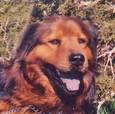

In [6]:
Image.open('/content/drive/MyDrive/Cats_and_Dogs_Dataset/dogs/dog.182.jpg')

##Image conversion to array

In [7]:
img_path='/content/drive/MyDrive/Cats_and_Dogs_Dataset/dogs/dog.182.jpg'

Converting the image to numpy array

In [8]:
img=imread(img_path)
print(img)

[[[130 110 101]
  [156 136 125]
  [139 119 108]
  ...
  [103  66  60]
  [124  81  75]
  [146 103  97]]

 [[ 99  80  66]
  [157 138 124]
  [161 142 127]
  ...
  [120  85  79]
  [125  84  80]
  [126  85  81]]

 [[155 134 115]
  [151 130 109]
  [148 128 104]
  ...
  [114  81  76]
  [108  73  71]
  [ 98  63  61]]

 ...

 [[111  40  34]
  [130  57  51]
  [155  80  75]
  ...
  [ 54  49  53]
  [ 58  52  54]
  [ 57  51  53]]

 [[136  66  58]
  [169 101  92]
  [189 122 114]
  ...
  [ 52  50  53]
  [ 35  30  34]
  [ 48  43  47]]

 [[164  94  84]
  [194 126 117]
  [207 144 135]
  ...
  [ 62  60  63]
  [ 43  41  44]
  [ 56  54  57]]]


Resizing and flattening the numpy array.

In [9]:
img=resize(img,(15,15))
img

array([[[0.60754699, 0.51906584, 0.39731031],
        [0.576317  , 0.48307701, 0.38977351],
        [0.57991926, 0.48630799, 0.39773429],
        [0.59593154, 0.50325646, 0.42064904],
        [0.52456308, 0.43462352, 0.40721243],
        [0.49165285, 0.41345548, 0.37642258],
        [0.4274414 , 0.36569926, 0.35767131],
        [0.42651079, 0.3604418 , 0.34757167],
        [0.55866009, 0.45755614, 0.3857413 ],
        [0.55620198, 0.42864555, 0.36835447],
        [0.68448451, 0.53748707, 0.49370417],
        [0.72383235, 0.60169496, 0.54061894],
        [0.63644746, 0.50715616, 0.434449  ],
        [0.51128699, 0.4001486 , 0.3456135 ],
        [0.57759359, 0.45854289, 0.41515133]],

       [[0.61215348, 0.50142464, 0.37691249],
        [0.63529274, 0.52548814, 0.40618812],
        [0.63211105, 0.52647091, 0.40222986],
        [0.64077642, 0.53629633, 0.42797554],
        [0.41101245, 0.34111025, 0.33690199],
        [0.44962907, 0.37206871, 0.35162489],
        [0.4860774 , 0.39393489,

In [10]:
img=img.flatten()

In [11]:
#Creating 2 empty lists as data and labels
data=[]
labels=[]

Converting all the images into a
1-D array and storing it into data
variable. Here Label contains
two categories i.e 0 (Cat) and
1 (Dog)

In [12]:
for category_idx,category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir,category)):
        img_path=os.path.join(input_dir,category,file)
        img=imread(img_path)    #img is numpy array
        img=resize(img,(15,15))
        data.append(img.flatten())
        labels.append(category_idx)

In [13]:
labels=np.asarray(labels)
data=np.asarray(data)

##Logistic Regression


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,shuffle=True,stratify=labels)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.5472636815920398

Accuracy obtained by logistic regression is 54 percent

##Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.5621890547263682

Accuracy obtained by decision tree model is 56 percent.

##Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
accuracy_score(y_test,y_pred)

0.6243781094527363

Accuracy obtained by random forest model is 62 percent.

##Hyperparameter Tuning - Random Forest

In [36]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)
param_grid={
    'n_estimators':[200,500],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy']
}
CV_rfc=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5)
CV_rfc.fit(x_train,y_train)
CV_rfc.best_params_
rfc1=RandomForestClassifier(random_state=42,max_features='auto',n_estimators=200,max_depth=8,criterion='gini')
rfc1.fit(x_train,y_train)
pred=rfc1.predict(x_test)
print('Accuracy for Random Forest on data:',accuracy_score(y_test,y_pred))

Accuracy for Random Forest on data: 0.6243781094527363


Accuracy obtained by random forest model is 62.4 percent

In [38]:
pd.DataFrame({'Actual_Value':y_test,'Predicted_Value':y_pred})

,Actual_Value,Predicted_Value
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
397,0,0
398,0,0
399,0,0
400,1,0


We have trained 2000 images of
cats and dogs. Increase in sample image
will lead to increase in accuracy.